# Hacker News Project

Hacker News is a website started by startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

In this project we're interested in posts with titles that begin with either `Ask HN` or `Show HN`. Users submit `Ask HN` posts to ask the Hacker News community a specific question. Below are a few examples:

```
Ask HN: How to improve my personal website?
Ask HN: Am I the only one outraged by Twitter shutting down share counts?
Ask HN: Aby recent changes to CSS that broke mobile?
```

Likewise, users submit `Show HN` posts to show the Hacker News community a project, product, or just something interesting. Below are a few examples:

```
Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'
Show HN: Something pointless I made
Show HN: Shanhu.io, a programming playground powered by e8vm
```

We'll compare these two types of posts to determine the following:

- Do `Ask HN` or `Show HN` receive more comments on average?
- Do posts created at a certain time receive more comments on average?

We'll be working with a dataset that has been reduced from 300,000+ to around 20,000 rows by removing all submissions that didn't receive any comments and then randomly sampling from the remainder. The original dataset can be found [here](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts), and the downsampled dataset that we'll be working with can be downloaded [here](https://dq-content.s3.amazonaws.com/356/hacker_news.csv).

## Filtering the Data

Let's begin by importing the dataset and checking the first several rows.

In [1]:
from csv import reader

hacker_news = open('hacker_news.csv')
hn = list(reader(hacker_news))

for i in range(5):
    print(hn[i])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']
['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']
['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']


Notice that the first row contains the header information for the dataset. In order to more easily analyze the data, it will be convenient to separate the header from the rest of the set.

In [2]:
headers = hn[0]
hn = hn[1:]

print(headers, '\n')
for i in range(5):
    print(hn[i])


['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']
['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']
['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']
['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']


Now that we've separated the header from the rest of the dataset, we can begin filtering our data. For our purposes, we only care about post titles beginning with `Ask HN` or `Show HN`. In order to more easily parse the data, we will separate the dataset into three subsets: `ask_posts`, `show_posts`, and `other_posts`.

In [3]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    title = title.lower()
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

print(f'Number of Ask Posts: {len(ask_posts)}')
print(f'Number of Show Posts: {len(show_posts)}')
print(f'Number of Other Posts: {len(other_posts)}')

Number of Ask Posts: 1744
Number of Show Posts: 1162
Number of Other Posts: 17194


We can see that Ask and Show posts make up about 17% of all posts in our dataset. Let's check the first few rows of each of our two relevant sets to ensure our filtering is correct.

In [4]:
for i in range(5):
    print(ask_posts[i])

print('\n')

for i in range(5):
    print(show_posts[i])

['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']
['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']
['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14']
['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', '1', '3', 'sph130', '8/2/2016 14:20']
['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', '28', '17', 'roykolak', '10/15/2015 16:38']


['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']
['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']
['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', 

It looks like our filter worked properly. Now we can begin analyzing the data.

## Preliminary Analysis

A useful piece of information for our first pass is whether ask posts or show posts receive more comments. Let's calculate the average comments for each and compare.

In [5]:
def find_average_comments(dataset):
    total_comments = 0

    for row in dataset:
        comments = int(row[4])
        total_comments += comments

    average = total_comments / len(dataset)

    return round(average, 2)

avg_ask_comments = find_average_comments(ask_posts)
avg_show_comments = find_average_comments(show_posts)

print(f'Average Ask Comments: {avg_ask_comments}')
print(f'Average Show Comments: {avg_show_comments}')

Average Ask Comments: 14.04
Average Show Comments: 10.32


It appears that ask posts receive 36% more comments than show posts. This makes sense, given that ask posts directly request interaction from the community. Show posts still receive a good amount of comments though, when they get any at all.

We must remember that our dataset threw out any posts that didn't receive comments at all, which would affect things like the averages and the relative difference between the two types of post. For a more involved version of this project, we could use the full dataset and see how it compares to what we see here.

## Comments by Hour Created

Now that we have our data separated, we can do a little more digging. It is likely that the success of a post (measured by the amount of community interaction, i.e. comments) is affected by when it is posted.

We want to know whether the timing of a post affects the interaction, so for each of the two datasets we will separate the day into 24 1-hour buckets. We will then count the number of posts in each bucket, and calculate the average number of comments.

Given that Hacker News is heavily favored by the tech and startup communites, and that those communities are concentrated in California, I expect posts during the day in Pacific Time (UTC-8) to have the most success.

In [6]:
import datetime as dt
from collections import OrderedDict

def generate_time_dicts(dataset):
    result_list = []
    counts_by_hour = dict()
    comments_by_hour = dict()

    for row in dataset:
        created_at = row[6]
        comments = int(row[4])
        result_list.append([created_at, comments])

    for post in result_list:
        date = dt.datetime.strptime(post[0], '%m/%d/%Y %H:%M')
        hour = date.strftime('%H')
        if hour in counts_by_hour:
            counts_by_hour[hour] += 1
        else:
            counts_by_hour[hour] = 1

        if hour in comments_by_hour:
            comments_by_hour[hour] += post[1]
        else:
            comments_by_hour[hour] = post[1]

    return counts_by_hour, comments_by_hour


def calculate_average_comments(counts, comments):
    averages_dict = dict()
    for hour in counts.keys():
        averages_dict[hour] = round(comments[hour] / counts[hour], 2)

    return averages_dict


ask_post_averages = calculate_average_comments(*generate_time_dicts(ask_posts))
ask_post_averages = OrderedDict(sorted(ask_post_averages.items()))
print('Average Comments per Hour (Ask Posts)\n')
for hour in ask_post_averages:
    print(f'{hour}:00: {ask_post_averages[hour]}')
          
show_post_averages = calculate_average_comments(*generate_time_dicts(show_posts))
show_post_averages = OrderedDict(sorted(show_post_averages.items()))
print('\nAverage Comments per Hour (Show Posts)\n')
for hour in show_post_averages:
    print(f'{hour}:00: {show_post_averages[hour]}')

Average Comments per Hour (Ask Posts)

00:00: 8.13
01:00: 11.38
02:00: 23.81
03:00: 7.8
04:00: 7.17
05:00: 10.09
06:00: 9.02
07:00: 7.85
08:00: 10.25
09:00: 5.58
10:00: 13.44
11:00: 11.05
12:00: 9.41
13:00: 14.74
14:00: 13.23
15:00: 38.59
16:00: 16.8
17:00: 11.46
18:00: 13.2
19:00: 10.8
20:00: 21.52
21:00: 16.01
22:00: 6.75
23:00: 7.99

Average Comments per Hour (Show Posts)

00:00: 15.71
01:00: 8.79
02:00: 4.23
03:00: 10.63
04:00: 9.5
05:00: 3.05
06:00: 8.88
07:00: 11.5
08:00: 4.85
09:00: 9.7
10:00: 8.25
11:00: 11.16
12:00: 11.8
13:00: 9.56
14:00: 13.44
15:00: 8.1
16:00: 11.66
17:00: 9.8
18:00: 15.77
19:00: 9.8
20:00: 10.2
21:00: 5.79
22:00: 12.39
23:00: 12.42


We have the data here, but it can be difficult to parse just a list of numbers. Let us chart the average number of comments vs hour, with the understanding that all times are listed in ET (UTC-5).

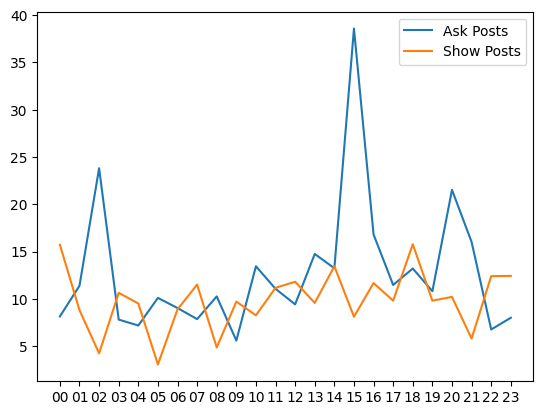

In [8]:
import matplotlib.pylab as plt

ask_x = ask_post_averages.keys()
ask_y = ask_post_averages.values()

plt.plot(ask_x, ask_y)

show_x = show_post_averages.keys()
show_y = show_post_averages.values()

plt.plot(show_x, show_y)
plt.legend(['Ask Posts', 'Show Posts'])
plt.show()

## Conclusion

When it comes to making ask posts, there appear to be three times when a post is likeliest to take off. Those times being 2am ET, 3pm ET, and 8pm ET. If we convert those to PT, we get 11pm, 12pm, and 5pm respectively. This matches up with our expectations that PT would be the dominant force for posts. It appears that the users of Hacker News are most likely to respond to ask posts during their lunch, right after work, and right before bed.

With show posts, the pattern is much more difficult to see. There appears to be a small uptick in average posts during the day (starting from 5am PT and ending at 12pm PT), but the noise of the data obfuscates whether that's a true pattern or just happenstance. Even at night we see small spikes at 12am PT and 4am PT.

One intersting pattern is that there appears to be an inverse relationship between the success of ask posts and show posts. When one spikes, the other dips and vice versa. This can be explained by the posts cannibalizing each other. When a post is most successful, it is taking eyes and comments away from other posts happening around the same time.